## Visualize simulated experiment

This notebook will make volcano plots of 3 representative simulated experiments to demonstrate what the simulation approach creates from a biological perspective (i.e. experiments created contain different sets of DEGs that are related)

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from ponyo import utils

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_human_general.tsv")
)

params = utils.read_config(config_filename)

In [3]:
# Load params
local_dir = params["local_dir"]
project_id = params['project_id']

simulated_DE_stats_dir = os.path.join(
    local_dir, 
    "DE_stats"
)

In [4]:
out_filename = "example_simulated_volcano.svg"

In [5]:
# Plot volcano plots
def make_volcano_plot(
    simulated_DE_stats_dir,
    project_id,
    num_examples,
    out_filename
):
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 4))
    
    for i in range(num_examples):
        
        # Get filename
        simulated_DE_stats_filename = os.path.join(
            simulated_DE_stats_dir,
            f"DE_stats_simulated_data_{project_id}_{i}.txt"
        )
        
        # Read simulated DE stats
        simulated_DE_stats_df = pd.read_csv(
            simulated_DE_stats_filename,
            sep="\t",
            index_col=0,
            header=0
        )

        # Take -log10 of adjusted p-value
        simulated_DE_stats_df["padj_log10"] = -np.log10(simulated_DE_stats_df["padj"])

        # Label DEGs by traditional criteria
        # log2FC > 1
        # padj < 0.05
        simulated_DE_stats_df["gene group"] = "none"
        simulated_DE_stats_df.loc[(abs(simulated_DE_stats_df["log2FoldChange"])>1) &
                              (simulated_DE_stats_df["padj"] <0.05),
                                  "gene group"
                             ] = "DEG"

        # Gene annotations
        annotate_genes_by_pval = list(simulated_DE_stats_df.nsmallest(5,"padj").index)
        annotate_genes_by_logFC = list(simulated_DE_stats_df.loc[abs(simulated_DE_stats_df["log2FoldChange"])>1].index)
        annotate_genes = list(set(annotate_genes_by_pval).intersection(annotate_genes_by_logFC))
        simulated_DE_stats_df.loc[annotate_genes, "annotate"] = annotate_genes
        
        # Plot
        colors = ["lightgrey", "#2c7fb8"]
        
        f = sns.scatterplot(
           data=simulated_DE_stats_df,
            x="log2FoldChange",
            y="padj_log10",
            hue="gene group",
            hue_order=["none", "DEG"],
            style="gene group",
            markers={
                "none": ".",
                "DEG": "o",
            },
            palette=colors,
            linewidth=0,
            alpha=0.5,
            legend=False,
            ax=axes[i],
            )
        
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        
        # Annotate DEGs that are at extremes
        if i==0:
            counter=0
            # Alternate annotations to be left and right of point due to over-crowding of points
            for gene in simulated_DE_stats_df.dropna().index:
                if counter%2 ==0:
                    f.text(
                        simulated_DE_stats_df.loc[gene,"log2FoldChange"]+0.4,
                        simulated_DE_stats_df.loc[gene,"padj_log10"],
                        simulated_DE_stats_df.loc[gene,"annotate"],
                        horizontalalignment='left',
                        size='medium', 
                        color='black',
                    )
                else:
                    f.text(
                        simulated_DE_stats_df.loc[gene,"log2FoldChange"]-3.8,
                        simulated_DE_stats_df.loc[gene,"padj_log10"],
                        simulated_DE_stats_df.loc[gene,"annotate"],
                        horizontalalignment='left',
                        size='medium', 
                        color='black',
                    )
                counter +=1
                    
        else:
            for gene in simulated_DE_stats_df.dropna().index:
                f.text(
                    simulated_DE_stats_df.loc[gene,"log2FoldChange"]+0.4,
                    simulated_DE_stats_df.loc[gene,"padj_log10"],
                    simulated_DE_stats_df.loc[gene,"annotate"],
                    horizontalalignment='left',
                    size='medium', 
                    color='black',
                )
    fig.legend(labels=["DEGs", "other genes"], loc='center right')
    fig.text(0.5, 0.0, "log2 Fold Change",ha="center", fontsize=14, fontname="Verdana")
    fig.text(0.08, 0.5, "-log10(FDR adjusted p-value)", va="center", rotation="vertical", fontsize=14, fontname="Verdana")
    fig.suptitle(f"Example simulated experiments based on {project_id}", fontsize=16, fontname="Verdana")
    
    # Save plot
    fig.savefig(
        out_filename,
        format="svg",
        bbox_inches="tight",
        transparent=True,
        pad_inches=0,
        dpi=300,
    )

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


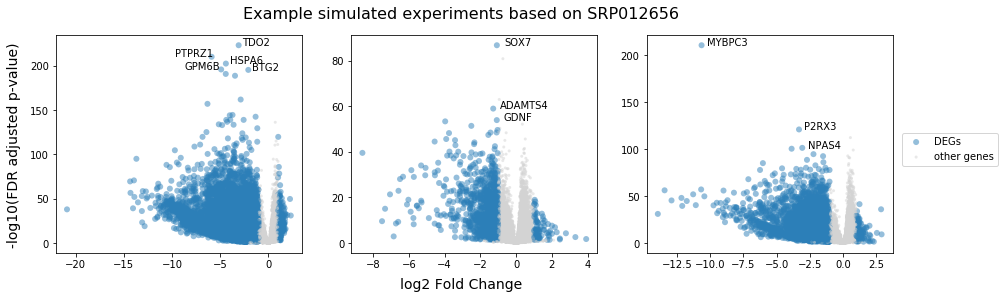

In [6]:
make_volcano_plot(simulated_DE_stats_dir, project_id, 3, out_filename)

From left to right:
* DEGs in the first simulated experiment are related to cell growth, cell cycle regulation, cell-to-cell signaling
* DEGs in the second simulated experiment are related to cell fate and cell differentiation
* DEGs in the third simulated experiment are related to ion channel gating within neurons, muscle heart development